(hybridsvm)=

# Квантово-классический SVM

## Описание лекции

Лекция будет построена следующим образом:

- Вспомним, что такое классический SVM
- Поговорим о классическом _kernel trick_
- Посмотрим, как можно использовать **VQC** как ядра SVM
- Напишем и применим код обучения смешанного SVM

## Классический SVM

В данной лекции мы будем много говорить об **SVM** (_Support Vector Machine_) -- алгоритме классического машинного обучения, в основе которого лежит построение оптимальной разделяющей гиперплоскости. Для детального понимания работы этого алгоритма настоятельно рекомендуется вернуться к вводной лекции про SVM.

Давайте кратко вспомним, как устроен этот алгоритм.

```{figure} /_static/qsvmblock/hybridsvm/Support_vector_machine.jpg
:width: 450px
:name: ClassicalSVM

Классический SVM
```

В данном случае алгоритм пытается найти такую разделяющую прямую (в многомерном случае это будет гиперплоскость), чтобы расстояния от этой прямой до точек разных классов были максимальными.

Поскольку обычно нам интересны многомерные пространства, то точки там превращаются в вектора. Также оказыается, что построение такой разделяющей плоскости зависит не от всех точек (векторов), а только от какого-то их подмножества -- опорных векторов. Именно поэтому метод и носит название _Support Vector Machine_.

```{note}
Одним из ключевых авторов алгоритма SVM является Владимир Вапник -- советский и американский (с 1991-го года) ученый, который также сделал огромный вклад в теорию классического машинного обучения. Его имя носит один из ключевых теоретических концептов машинного обучения -- размерность Вапника-Червоненкиса.
```

### Сильные стороны SVM

У этого алгоритма есть несколько очень сильных сторон, если сравнивать его, например, с алгоритмом логистической регрессии:

- В реальности нам интересны не все точки, а лишь те, которые лежат вблизи разделяющей гиперплоскости
- Задача поиска такой прямой может быть сформулирована как задача квадратичного программирования
- Решение задачи квадратичного программирования может быть получено аналитически
- Решение может быть сформулировано с использованием лишь скалярных произведений векторов

## Kernel-trick

Наиболее интересным для нас будет последнее из списка. Ведь в данном случае мы можем искать оптимальные разделяющие гиперплоскости даже в пространстве бесконечной размерности -- главное, чтобы в этом пространстве было определено скалярное произведение.

Это используется в расширении SVM, которое называется **ядерный** SVM. В данном случае мы используем **ядро** для вычисления скалярного произведние и строим разделяющую гиперплоскость не в исходном пространстве, где данные, вообще говоря, могут быть неразделимыми, а в новом пространстве. Для этого нам необходимо лишь иметь выражение для скалярного произведения, которое и называется **ядром**. Хорошие примеры ядер для SVM:

- Полиномиальное ядрно
- Радиально-базисная функция (_Radial basis function_)

```{figure} /_static/qsvmblock/hybridsvm/Kernel_trick_idea.svg.png
:width: 600px
:name: KernelTrick

Пример разделимости в новом пространстве
```

Давайте посмотрим на то, как выглядят популярные ядра.

### Полиномиальное ядро

Для степени ядра $d$ и параметра нормализации $c$ скалярное произведение двух векторов $x, y$ определяется так:

$$
K(x, y) = (x^Ty + c)^d
$$

### RBF

Для параметра ядра $\sigma$ формула для скалярного произведения такая:

$$
K(x, y) = e^{-\frac{||x - y||^2}{\sigma}}
$$

### Проблемы с ядрами

Несмотря на огромный потенциал, у ядерного SVM есть большая проблема -- масштабируемость. Вычислять ядра иногда может быть проблематично, из-за этого на действительно больших данных на первое место в последние годы вышли нейронные сети.

А теперь давайте посмотрим, что квантовые компьютеры могут дать классическому SVM!

## VQC как ядерная функция

Как мы много говорили в более ранних лекциях, квантовые схемы позволяют нам оперировать в гильбертовых пространствах волновых функций. Эти пространства имеют экспоненциально большую размерность, при этом они параметризуются линейным количеством параметров. А еще в этих пространствах определены скалярные произведения волновых функций, более того, именно результат выборки из скалярного произведения мы чаще всего и получаем как результат измерений!

Давайте попробуем посмотреть, что общего у **VQC** и ядер.

- Оба оперируют в пространстве большой (или бесконечной размерности)
- И там, и там работа идет в гильбертовом пространстве и определено скалярное произведение
- И там, и там результат вычисляется как скалярное произведение

```{note}
Это интересно, что многие специалисты в области **QML** сегодня даже предлагают вместо термина "квантовая нейросеть" использовать термин "квантовое ядро", так как математически **VQC** гораздо ближе именно к ядрам, чем к слоям современных глубоких сетей. Этой теме у нас даже посвящена одна из более ранних лекций продвинутого уровня, где разбираются доводы из статьи {cite}`vqcaskernels`.
```

Очевидная идея -- попробовать как-то воспользоваться квантовой схемой, чтобы реализовать скалярное произведение двух классических векторов. Именно это и сделали авторы работы {cite}`qsvmidea`.

### Преобразование состояния

На самом деле, если просто использовать какие-то простые квантовые операции, мы не получим какого-то преимущества над классическим ядерным SVM -- ведь все то же самое можно будет сделать и на классическом компьютере.

Чтобы получить реальное преимущество, нам необходимо использовать запутывание и прочие "фишки" квантовых вычислений.

Дальше мы не станем изобретать велосипеды, а вместо этого воспользуемся примерами хороших преобразований из работы {cite}`qsvmmap`. Рассмотрим, что именно там описано.

#### Общая схема

Для простоты формул мы не будем выписывать обобщенные формулы, а все будем писать для нашего двумерного пространства. Тогда наша схема может быть разделена на несколько частей:

- гейты Адамара и гейты $CNOT$
- операции, основанные на элементах входного вектора
- попарные операции над парами элементов вектора

Мы начинаем с того, что переводим кубиты в состояние суперпозиции, применяя операторы Адамара. Далее мы применяем однокубитные параметризованные операции и снова гейты Адамара. После этого мы применяем связку $CNOT$ --> параметризованная парой операция --> $CNOT$.

#### Выбор операции

Следуя идее упомянутой статьи, в качестве что одно-элементной, что двух-элементной операции мы будем использовать гейт $U_1$. Разница будет лишь в том, что мы передаем на вход в качестве параметра.

#### Feature function

В качестве параметров на входе гейта $U_1$, как мы уже говорили, выступают один или два элемента вектора $x$. Строго это можно записать как функцию такого вида:

$$
\phi(x_1, x_2) = \begin{cases}
\phi(x),\text{    }x_1 = x_2 \\
\phi(x_1, x_2),\text{    }x_1 \neq x_2
\end{cases}
$$

Мы будем называть ее _feature function_. В некотором смысле можно сказать, что именно эта функция определяет тип ядра по аналогии с классическим SVM. В работе {cite}`qsvmmap` описано много разных вариантов таких _feature function_, мы будем использовать следующую:

$$
\begin{gathered}
\phi(x) = x \\
\phi(x_1, x_2) = \pi \cos{x_1} \cos{x_2}
\end{gathered}
$$

#### Скалярное произведение

Все что мы описали выше, обобзначим как квантовую схему $U(x)$. Она преобразует нам вектор классических данных $x$ в квантовое состояние $\ket{\Psi}$. Но нам то нужно получить скалярное произведение $\braket{U(x_1)|U(x_2)}$! Выглядит сложно, но на самом деле существует эффективный способ получить эту величину без необходимости восстанавливать весь вектор состояния. Можно показать, что величина $\braket{U(x_1)|U(x_2)}$ равна вероятности нулевой битовой строки ($\ket{0, 0, ...., 0}$) при измерении другой схемы: $U(x_1)U(x_2)^\dagger$.

Все это может казаться сложным и запутанным, но должно стать гораздо понятнее, когда мы посмотрим на пример реализации от начала и до конца.

## Пример реализации

### Схема

Для начала необходимые импорты.

In [1]:
from pennylane import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import make_moons

Помимо всех привычных, нам еще потребуется классический SVM из `scikit-learn`:

In [2]:
from sklearn.svm import SVC

Мы будем работать с уже привычным нам набором "Tow Moons". Только в этом случае мы будем использовать чуть-чуть другую нормализацию -- для нашего ядра элементы вектора **x** должны быть в интервале $[-1, 1]$. Сразу переведем наши данные в этот диапазон:

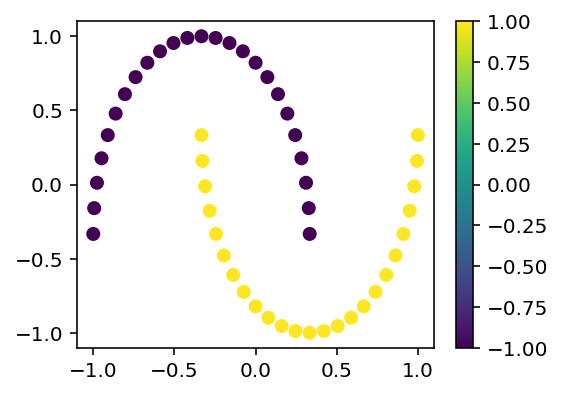

In [3]:
x, y = make_moons(n_samples=50)
y = y * 2 - 1

def normalize(x):
    """
    Переводит значения в интервал от -1 до 1
    """
    min_ = x.min()
    max_ = x.max()
    return 2 * (x - min_) / (max_ - min_) - 1

x[:, 0] = normalize(x[:, 0])
x[:, 1] = normalize(x[:, 1])

plt.figure(figsize=(4, 3))
cb = plt.scatter(x[:, 0], x[:, 1], c=y)
plt.colorbar(cb)
plt.show()

И привычное нам объявление устройства.

In [4]:
dev = qml.device("default.qubit", 2)

Теперь давайте для начала реализуем наше преобразование над одним из векторов ($U(x)$). Поскольку далее нам потребуется еще и $U(x)^\dagger$, то мы сразу воспользуемся декоратором `@qml.template`, который позволит нам автоматически получить обратную схему.

In [5]:
@qml.template
def var_layer(x):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    qml.U1(x[0], wires=0)
    qml.U1(x[1], wires=1)

    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    qml.CNOT(wires=[0, 1])
    qml.U1(np.pi * np.cos(x[0]) * np.cos(x[1]), wires=1)
    qml.CNOT(wires=[0, 1])

А теперь реализуем $\braket{U(x_1)|U(x_2)} = \bra{U(x_1)U(x_2)^\dagger \Psi} M_0 \ket{U(x_1)U(x_2)^\dagger \Psi}$. Тут $M_0$ -- это проектор на один из собственных векторов системы кубитов, а именно на "нулевой": $M_0 = \ket{0, ..., 0}\bra{0, ..., 0}$. Проще говоря, мы реализуем схему, которая нам дает вероятности каждой из битовых строк (а дальше мы просто возьмем первую, она и отвечает строке $0,...0$):

In [6]:
@qml.qnode(dev)
def dot_prod(x1, x2):
    var_layer(x1)
    qml.inv(var_layer(x2))

    return qml.probs(wires=[0, 1])

Ну и сразу вспомогательную функцию, которая нам считает то, что нам было нужно:

In [7]:
def q_dot_prod(i, j):
    x1 = (x[i, 0], x[i, 1])
    x2 = (x[j, 0], x[j, 1])
    return dot_prod(x1, x2)[0]

Для самопроверки убедимся в том, что наше "скалярное произведение" симметрично:

In [8]:
print(np.allclose(q_dot_prod(0, 1), q_dot_prod(1, 0)))

True


И сразу посмотрим на то, как выглядит наша схема:

In [9]:
print(dot_prod.draw())

 0: ──H──Rϕ(-0.739)──H──╭C────────────╭C──╭C───────────────╭C────H⁻¹──Rϕ(0.949)⁻¹───H⁻¹──╭┤ Probs 
 1: ──H──Rϕ(0.724)───H──╰X──Rϕ(1.74)──╰X──╰X⁻¹──Rϕ(1.8)⁻¹──╰X⁻¹──H⁻¹──Rϕ(-0.177)⁻¹──H⁻¹──╰┤ Probs 



### Гибридный SVM

Мы не будем сами с нуля писать решение задачи квадратичного программирования. Мы воспользуемся готовой рутиной из `scikit-learn`. Используемая там реализация позволяет вместо ядерной функции передать сразу матрицу Грама ([Gram matrix](https://en.wikipedia.org/wiki/Gram_matrix)). На самом деле это просто матрица всех попарных скалярных произведений наших векторов. Вычислим ее, сразу воспользовавшись тем, что $\braket{U(x)|U(x)} = 1$ и $\braket{U(x_1)|U(x_2)} = \braket{U(x_2)|U(x_1)}$:

In [10]:
gram_mat = np.zeros((x.shape[0], x.shape[0]))

for i in range(x.shape[0]):
    for j in range(x.shape[0]):
        if i == j:
            gram_mat[i, j] = 1
        if i > j:
            r = q_dot_prod(i, j)
            gram_mat[i, j] = r
            gram_mat[j, i] = r

Обучим нашу модель:

In [11]:
model = SVC(kernel="precomputed")
model.fit(gram_mat, y)

SVC(kernel='precomputed')

Посчитаем предсказания и посмотрим на результат:

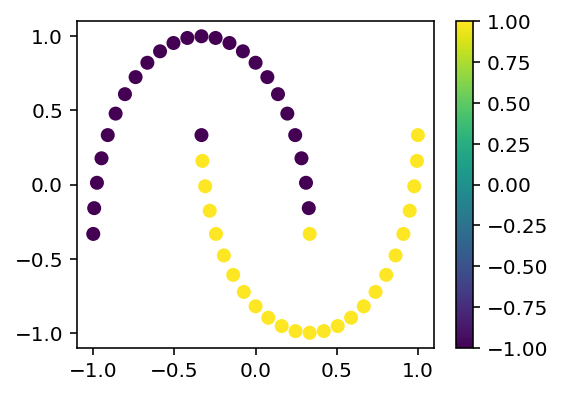

In [12]:
preds = model.predict(X=gram_mat)

plt.figure(figsize=(4, 3))
cb = plt.scatter(x[:, 0], x[:, 1], c=preds)
plt.colorbar(cb)
plt.show()

Результат выглядит неплохо!

## Заключение

Расчет полной матрицы скалярных произведений дает нам сложность $O(N^2)$ вызовов. Но основной потенциал гибридного SVM в том, что задачу квадратичной оптимизации на самом деле можно тоже решать на квантовом компьютере, используя алгоритм Гровера (про него рассказано в ранних факультативных лекциях), причем за сложность всего $O(N)$ и без расчета полной матрицы Грама!

Многие считают, что NISQ квантовые компьютеры могут стать для SVM чем-то типа видеокарт для нейронных сетей и вернуть этот алгоритм на пъедестал лучших алгоритмов машинного обучения!